# 클래스 불균형 문제
---
- 클래스 변수가 `하나의 값에 치우친 데이터` 로 모델을 학습할때 발생

- 학습한 분류 모델이 `치우친 클래스에 대해 편향` 되는 문제가 발생한다.

- 클래스 불균형 문제가 있는 모델은 **`정확도가 높고, 재현율이 매우 낮은 경향`** 이 있다.


- 클래스 불균형 문제는 **`분류 모델`** 에서만 발생한다.
---
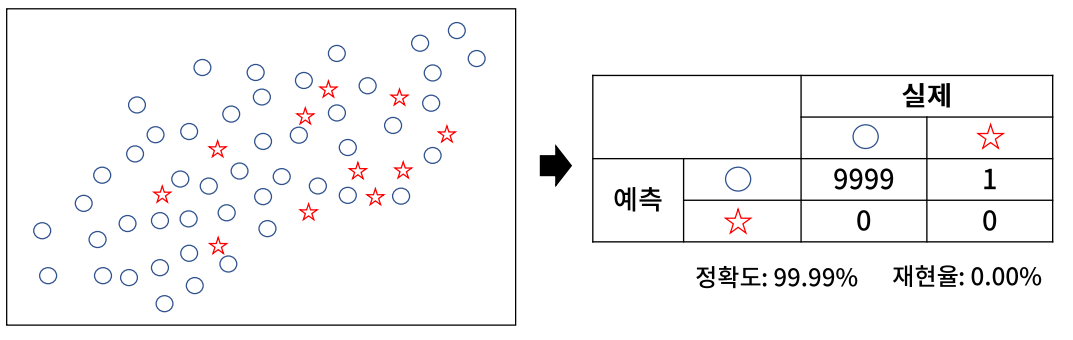

---
- 예를 들어 위의 그림을 암환자를 판별하기 위한 실제 데이터라고 할때, 암환자의 수에 대한 샘플이 훨씬 적을것이다.
- 이때, 해당 데이터로 모델을 학습시키면 모델은 대부분 암환자가 아니라고(=정상) 예측을 할 것이다.
- 얼핏 결과만 보면 정확도가 매우 높아 모델이 올바른 판단을 한 듯 보이지만, 재현율이 매우 낮아 문제가 있는 모델이 된다.

# 관련 용어
---

- `다수 클래스` : 대부분의 샘플이 속한 클래스 (e.g : 정상인)


- `소수 클래스` : 대부분의 샘플이 속하지 않은 클래스 (e.g : 암환자)
    - 반드시 그런 것은 아니지만, 일반적으로 다수클래스가 관심대상이 아닌 부정 클래스 이고, 소수 클래스가 관심대상인 긍정 클래스 이다.
    - 관심대상 : 분류하여 판별하고 싶은 대상


- `위양성 비용 (False positive : TP)` : `부정` 클래스 샘플을 `긍정` 클래스 라고 잘못 분류해서 발생하는 비용


- `위음성 비용 (False negative : TN)` : `긍정` 클래스 샘플을 `부정` 클래스 라고 잘못 분류해서 발생하는 비용


- 일반적으로 TN이 TP 보다 훨씬 크다.
    - 정상인을 암환자라고 판별 (위양성비용) : 재검사 혹은 암치료 등을 위한 시간과 비용 발생 (즉, 돈과 시간이라는 비용 발생)
    - 암환자를 정상인이라고 판별 (위음성 비용) : 암 여부를 모르고 병이 악화되어 최악의 경우 사망 (즉, '생명' 이라는 비용 발생)
    - 꼭 암환자 예시가 아니더라도 대부분의 예시에서 위의 관계가 성립한다.


- **절대 부족** : `소수 클래스에 속한 샘플 개수` 가 절대적으로 부족한 상황
    - 소수 클래스가 적은것은 당연한 것이지만 말그대로 절대적으로 부족한 상황일때를 의미

# 클래스 불균형 문제의 발생 원인
---
- 대부분의 분류 모델의 학습 목적은 `정확도를 최대화 하는 것` 이다. 
- 따라서 대부분 샘플을 다수 클래스라고 분류하도록 학습된다. 
- 즉, 정확도를 높이는 것에만 집중하기 때문에 `소수 클래스` 를 잘 분리하기 위한 노력을 하지 않는다.
---

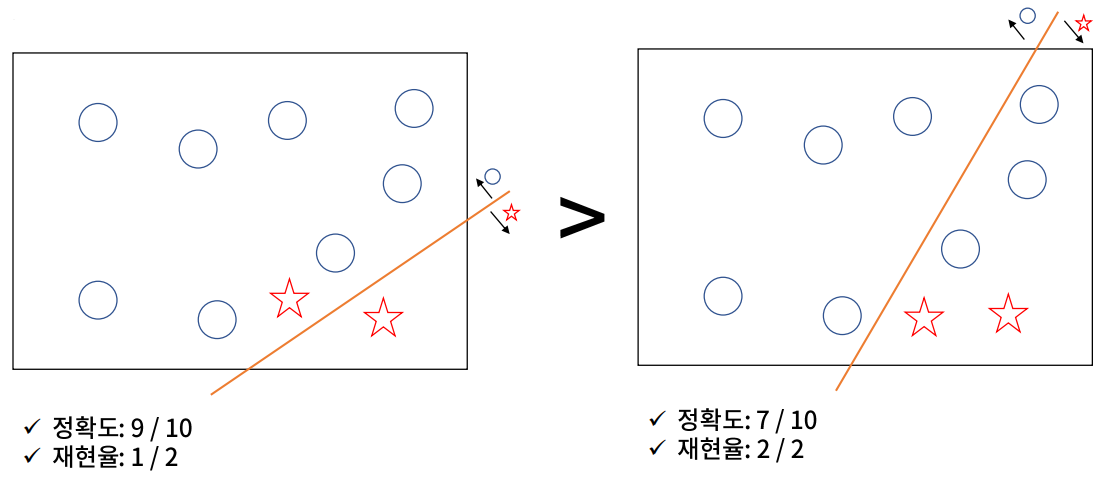

---
- 위 그림에서 별표는 긍정 클래스 (e.g :암환자) 이다.
- 왼쪽 그림의 경우 정확도는 90%이지만, 재현율은 50%이다.
- 오른쪽 그림의 경우 재현율을 더 높이기 위해 그래프를 우측으로 이동시켰다.
    - 이로 인해 정확도가 낮아지는 trade-off가 발생한다.
    - 하지만 반대로 재현율이 100%로 높아진다.

- 이 경우 두 모델중 어느 모델이 더 좋은지를 판단하면 대부분의 모델은 `정확도가 높은` 좌측 모델이 더 좋다고 평가한다.
---

# 클래스 불균형 문제 탐색 방법 (1) 클래스 불균형 비율 측정
---
- 일반적으로, `"클래스 불균형 비율이 9 이상이면, 편향된 모델이 학습될 가능성이 있다."` 고 판단한다. (절대적 기준 X 주의)
---

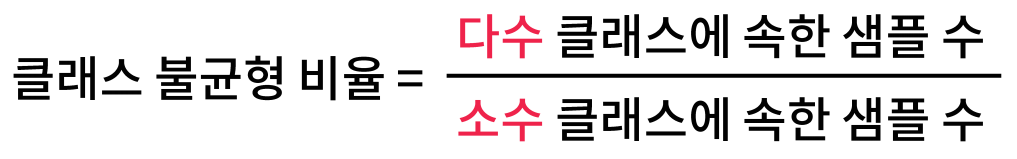

---
- 단, 아래의 그림처럼 클래스 불균형 비율이 높다고 반드시 편향된 모델을 학습한다는 의미는 아님을 염두해 두어야 한다.


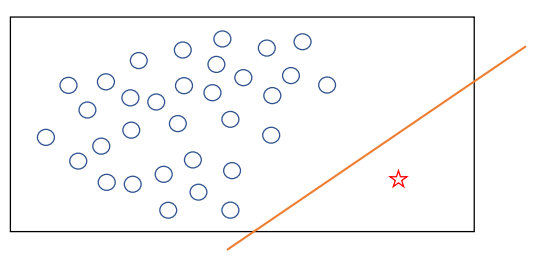

---

- **클래스 불균형 문제는 클래스 자체가 불균형 한것이 문제가 아니다.**
- 클래스가 불균형 함으로 인해서 `편향된 모델이 만들어지는 것`이 문제 이다.

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

In [2]:
df = pd.read_csv("Secom.csv")

In [3]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [4]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
# 특징이 매우 많음(590개)
Train_X.shape

(1175, 590)

In [6]:
# 클래스 불균형 확인
# 불량이 1096개 / 정상이 79개
# 즉, 언더샘플링을 적용하기에는 부적절 
Train_Y.value_counts()

-1    1103
 1      72
Name: Y, dtype: int64

- 일반적으로 label값이 한쪽에 몰려있으면 편형된 모델이 만들어질 가능성이 있다.<br><br>
- 클래스 자체가 불균형한것은 문제가 아닐 수도 있다.! (위의 그림 참조)

In [7]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

15.319444444444445

- 클래스 불균형 비율이 9를 넘어 매우 심각하다.


- 편향된 모델이 만들어질 가능성이 있다.

# 클래스 불균형 문제 탐색 방법 (2) KNN
---
- KNN은 이웃의 클래스 정보를 바탕으로 분류를 하는 모델로 클래스가 불균형 하면 모델의 성능이 떨어진다.

- 역으로 말하자면 KNN은 **클래스 불균형에 매우 민감한 모델**로서 `클래스 불균형 여부를 진단하는데 매우 적절한 모델`이라 할 수 있다.

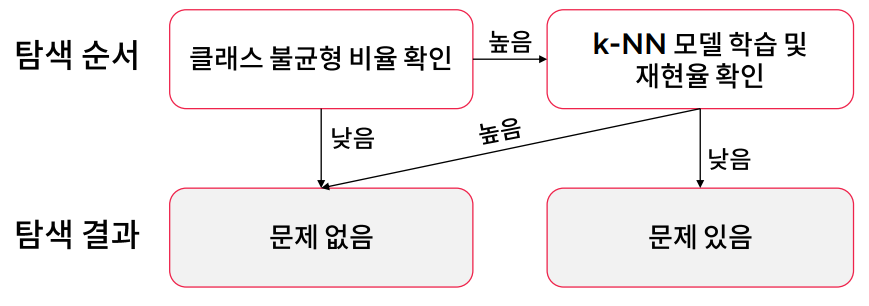

---
- 클래스 불균형 판단 지표는 `재현율` 이다.
- k값이 크면 클수록 Kmeans 모델은 불균형에 더욱 민감해진다.
- `일반적으로 k값을 5 ~ 11 정도`로 설정하여 문제를 진단한다.

In [8]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

# 모델 생성
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)

# 예측
pred_Y = kNN_model.predict(Test_X)

# 재현율 출력
print(recall_score(Test_Y, pred_Y))

# 정확도 출력
print(accuracy_score(Test_Y, pred_Y))

# 정확도는 90%이상이지만, 재현율이 0%로 불균형이 심각한 수준이다.

0.0
0.9183673469387755


클래스 불균형이 있으면 재현율(recall) 이 거의 0에 가깝게 나오기 때문에 클래스 불균형을 판단하는 것이 어렵지 않다.

# 클래스 불균형을 해소하는 방법
---

- 클래스 불균형 해소의 핵심은 `소수 클래스에 대한 결정공간을 넓히는 것` 이다.
    - 결정공간 : 한 샘플이 특정 클래스로 결정되기 위한 공간
    
- 암환자 케이스를 예시로 든다면, 암환자일 가능성(긍정)이 조금이라도 있으면 가급적이면 암환자라고 판단하는 것이다.

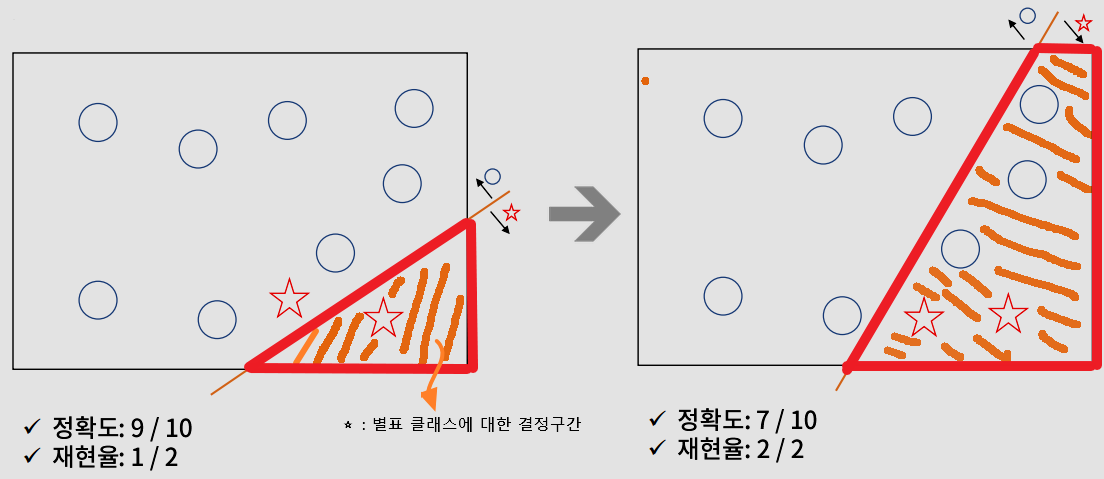

---
- 별표 클래스에 대한 `결정공간` 을 우측 그림과 같이 더 크게 키우면서 이전보다 1개더 많은 별표를 분류해낼 수 있게 되었다.
- 다만 이 과정에서 동그라미 클래스를 오판할 가능성도 동시에 증가했다.


- **하지만, 클래스 불균형 해소에 핵심은 `소수 클래스에 대한 결정공간을 넓히는 것`임을 명심해야 한다.**
    - 평가지표상 재현율은 올라가지만 정확도는 다소 떨어질수 밖에 없다.
    - 이는 이론적인 가정으로 정확도와 재현율이 동시에 올라가는 경우도 있을 수 있다.
    - 단, 소수 클래스의 결정공간을 넓혔을때 재현율이 떨어지는 경우는 발생하지 않는다.
---